In [1]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;

In [2]:
# Load files. CONDITION / REPLICATE / NUM_BLEB columns
wt4 = pd.read_csv("WT_DIV4_BLEBS.csv");
wt10 = pd.read_csv("WT_DIV10_BLEBS.csv");
ko4 = pd.read_csv("KO_DIV4_BLEBS.csv");
ko10 = pd.read_csv("KO_DIV10_BLEBS.csv");


In [3]:
max(ko10.NUM_BLEB)  #use this value to set intervals/range


37

In [4]:
# Define intervals: 0-40 blebs, interval of 10.
intervals = pd.interval_range(start=0, freq=10, end=40, closed='left');  

# Make empty variables for histogram dataframe
wt4_binned = [];
wt10_binned = [];
ko4_binned = [];
ko10_binned = [];

# Cut data into intervals of 10 and make count into dataframes
cutwt4 = pd.cut(wt4['NUM_BLEB'],bins=intervals);
wt4_binned = cutwt4.value_counts().sort_index();
wt4_binned_df = pd.DataFrame(wt4_binned);

cutwt10 = pd.cut(wt10['NUM_BLEB'],bins=intervals);
wt10_binned = cutwt10.value_counts().sort_index();
wt10_binned_df = pd.DataFrame(wt10_binned);

cutko4 = pd.cut(ko4['NUM_BLEB'],bins=intervals);
ko4_binned = cutko4.value_counts().sort_index();
ko4_binned_df = pd.DataFrame(ko4_binned);

cutko10 = pd.cut(ko10['NUM_BLEB'],bins=intervals);
ko10_binned = cutko10.value_counts().sort_index();
ko10_binned_df = pd.DataFrame(ko10_binned);
    
# Check output
print(ko10_binned_df)

          NUM_BLEB
[0, 10)         88
[10, 20)        60
[20, 30)        16
[30, 40)         3


In [5]:
alldata = pd.concat([wt4_binned_df,wt10_binned_df,ko4_binned_df,ko10_binned_df],axis=1);
alldata.columns = ["WT DIV4","WT DIV10","KO DIV4","KO DIV10"];

In [6]:
alldata.index = ["0-9","10-19","20-29","30-39"];

In [7]:
alldata

,WT DIV4,WT DIV10,KO DIV4,KO DIV10
0-9,113,136,174,88
10-19,0,0,4,60
20-29,0,0,0,16
30-39,0,0,0,3


In [8]:
# Save this frequency file
#alldata.to_csv("DIV4-10_Bleb_Frequency_Distribution.csv");

In [9]:
# Get pct distributions

pctalldata = alldata.div(alldata.sum(axis=0),axis=1);
pctalldata = pctalldata*100;

# check output
pctalldata

,WT DIV4,WT DIV10,KO DIV4,KO DIV10
0-9,100.0,100.0,97.752809,52.694611
10-19,0.0,0.0,2.247191,35.928144
20-29,0.0,0.0,0.000000,9.580838
30-39,0.0,0.0,0.000000,1.796407


In [10]:
# Rename columns (simplified) for plotting
pctalldata.columns=["DIV4", "DIV10", "DIV4", "DIV10"];

# Transpose for plotting
blebfreq_final = pctalldata.transpose();
blebfreq_final = blebfreq_final.reset_index();

# check output
blebfreq_final


,index,0-9,10-19,20-29,30-39
0,DIV4,100.000000,0.000000,0.000000,0.000000
1,DIV10,100.000000,0.000000,0.000000,0.000000
2,DIV4,97.752809,2.247191,0.000000,0.000000
3,DIV10,52.694611,35.928144,9.580838,1.796407


In [11]:
# color palette choices
OkabeIto = ["#E69F00","#56B4E9","#009E73","#F0E442","#0072B2","#D55E00","#CC79A7","#000000"];
#TolBright = ['#4477AA','#66CCEE','#228833','#CCBB44','#EE6677','#AA3377','#BBBBBB','#000000'];
TolBright = ['#4477AA','#EE6677','#228833','#CCBB44','#66CCEE','#AA3377','#BBBBBB','#000000'];  #changed order 1/13/22
Tolhighcontrast = ['#004488','#BB5566','#DDAA33']; #use this one for WT vs KO


sns.set_style("whitegrid", {'axes.grid' : False, 'ytick.left': True,'xtick.bottom': True});
# Set color palette
sns.set_palette(sns.color_palette(TolBright));

# Set font type
plt.rcParams['font.sans-serif'] = "Arial";
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif";

<Figure size 1440x1440 with 0 Axes>

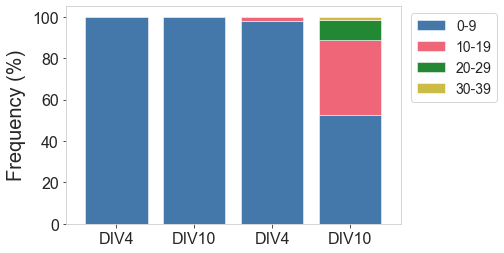

In [40]:
# Set color palette
sns.set_palette(sns.color_palette(TolBright));

plt.gcf().set_size_inches(20, 20);
ax = blebfreq_final.plot(x='index', kind='bar', stacked=True, width=0.8, fill=True,linewidth=0.5);

ax.set(xlabel=None);
#ax.set_xlabel('Sample', fontsize=20, labelpad=30);
ax.set_ylabel('Frequency (%)', fontsize=20, labelpad=6);
ax.tick_params(labelsize=16);
#ax.set_title('Bleb Frequency',fontsize=24, pad=20);

#ax.legend(bbox_to_anchor=(1.02, 1),fontsize=14);
ax.legend(loc="upper center",bbox_to_anchor=(1.16, 1),fontsize=14);
plt.xticks(rotation=0);


plt.savefig('DIV4-10 Bleb Frequency_newcolor.pdf', dpi=600, bbox_inches='tight'); 
plt.savefig('DIV4-10 Bleb Frequency_newcolor.svg', dpi=600, bbox_inches='tight'); 